Checking the GENEWIZ-30-286594819 data set for quality and sample swaps.  The samples are MSSM_338_NeuN_pl MSSM_065_NeuN_pl MSSM_033_NeuN_pl MSSM_310_NeuN_pl.  Consult 2018-12-18-verifyBamID for interpretation and technical details.

In [387]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import attila_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import io
import data_check
matplotlib.rcParams['figure.dpi'] = 150
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mapped reads

This is readily investigated by `samtools idxstats` after indexing BAMs

In [388]:
indivs = ['MSSM_033', 'MSSM_310', 'MSSM_338', 'MSSM_065']
idxstats = pd.concat([data_check.idxstats(s, 'NeuN_pl') for s in indivs], axis=0)
idxstats

,Name,Length,Mapped,Unmapped,% Unmapped,Sample
0,1,249250621,44621626,381373,0.847439,MSSM_033_NeuN_pl
1,2,243199373,60993321,1491713,2.387312,MSSM_033_NeuN_pl
2,3,198022430,30788724,314107,1.009898,MSSM_033_NeuN_pl
3,4,191154276,28117949,315804,1.110666,MSSM_033_NeuN_pl
4,5,180915260,28411898,290538,1.012242,MSSM_033_NeuN_pl
...,...,...,...,...,...,...
82,GL000225.1,211173,83990,558,0.659980,MSSM_065_NeuN_pl
83,GL000192.1,547496,70199,342,0.484824,MSSM_065_NeuN_pl
84,NC_007605,171823,257,4,1.532567,MSSM_065_NeuN_pl
85,hs37d5,35477943,24770683,99344,0.399453,MSSM_065_NeuN_pl


Text(0.5, 1.0, 'zoom')

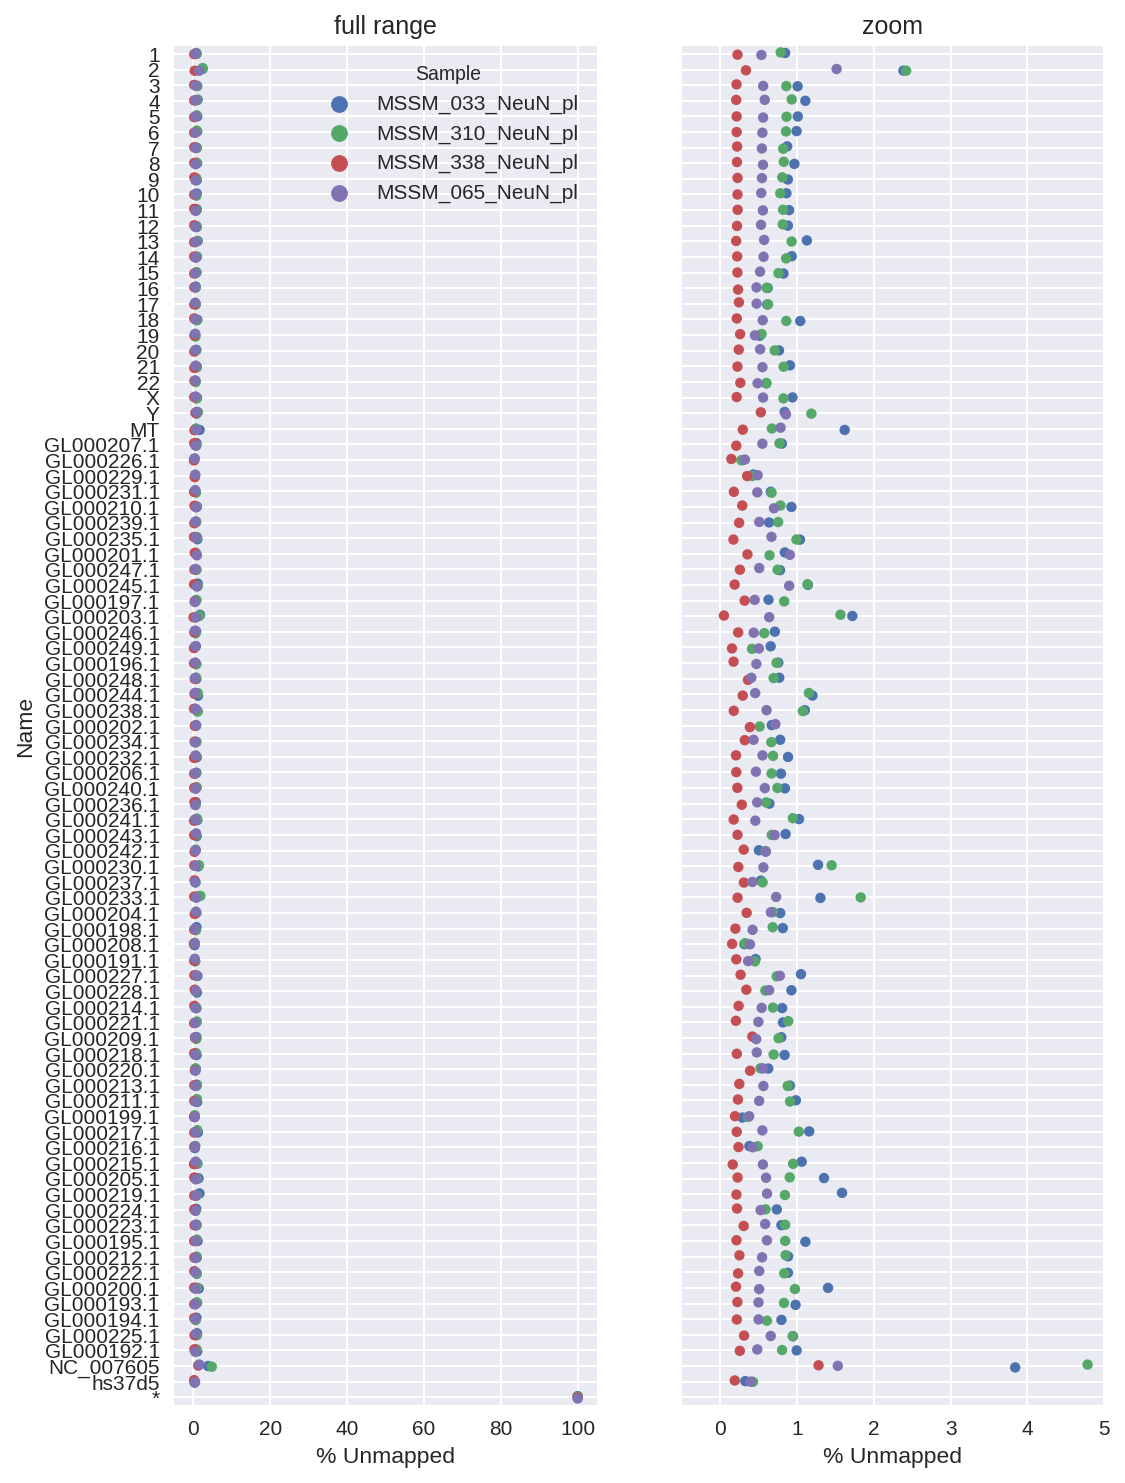

In [392]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 12], sharey=True)
sns.stripplot(x='% Unmapped', y='Name', data=idxstats, hue='Sample', ax=ax[0])
sns.stripplot(x='% Unmapped', y='Name', data=idxstats, hue='Sample', ax=ax[1])
ax[0].grid('x')
ax[1].grid('x')
ax[1].set_xlim([-0.5, 5])
ax[1].set_ylabel('')
ax[1].legend().set_visible(False)
ax[0].set_title('full range')
ax[1].set_title('zoom')
#fig.suptitle('Mapped Reads by samtools idxstats')

The plot shows that samples differ in the % of unmapped reads but even for the worst sample MSSM_033_NeuN_pl only $\approx 1\%$ of the reads are unmapped.

## Sample purity and label swap

Recall that the notebook entry 2018-12-18-verifyBamID used `verifyBamID` to check (mapped) sequencing data for sample purity and swap.  Here we apply the same procedure to MSSM_338_NeuN_pl MSSM_065_NeuN_pl MSSM_033_NeuN_pl MSSM_310_NeuN_pl

In [393]:
%%bash
# first create 2019-11-04-GENEWIZ-data-check/doCMCverifyBamID script similarly to 2018-12-18-verifyBamID/doCMCverifyBamID
if false; then
    cd /projects/bsm/attila/results/2019-11-04-GENEWIZ-data-check
    ./doCMCverifyBamID
fi

In [394]:
vres = pd.read_csv('all.selfSM', sep='\t')
vres

,sample,indivID,tissue,SEQ_ID,RG,CHIP_ID,SNPS,READS,AVG_DP,FREEMIX,...,FREE_RH,FREE_RA,CHIPMIX,CHIPLK1,CHIPLK0,CHIP_RH,CHIP_RA,DPREF,RDPHET,RDPALT
0,MSSM_033_NeuN_pl,MSSM_033,NeuN_pl,0_MSSM_106,ALL,0_MSSM_106,668238,6000369,8.98,0.00554,...,NaN,NaN,0.00837,1438160.07,1460164.54,NaN,NaN,8.968,0.9982,1.0171
1,MSSM_065_NeuN_pl,MSSM_065,NeuN_pl,0_MSSM_135,ALL,0_MSSM_135,668238,9456314,14.15,0.00183,...,NaN,NaN,0.00163,2118895.14,2122625.25,NaN,NaN,14.129,1.0061,0.9962
2,MSSM_310_NeuN_pl,MSSM_310,NeuN_pl,0_MSSM_356,ALL,0_MSSM_356,668238,11282652,16.88,0.00764,...,NaN,NaN,0.00757,2563161.76,2598727.35,NaN,NaN,16.859,1.0041,1.0039
3,MSSM_338_NeuN_pl,MSSM_338,NeuN_pl,0_MSSM_381,ALL,0_MSSM_381,668238,12990848,19.44,0.00324,...,NaN,NaN,0.00324,2851525.68,2864803.73,NaN,NaN,19.424,1.0028,1.0006


['named-figure/freemix.png', 'named-figure/freemix.pdf']

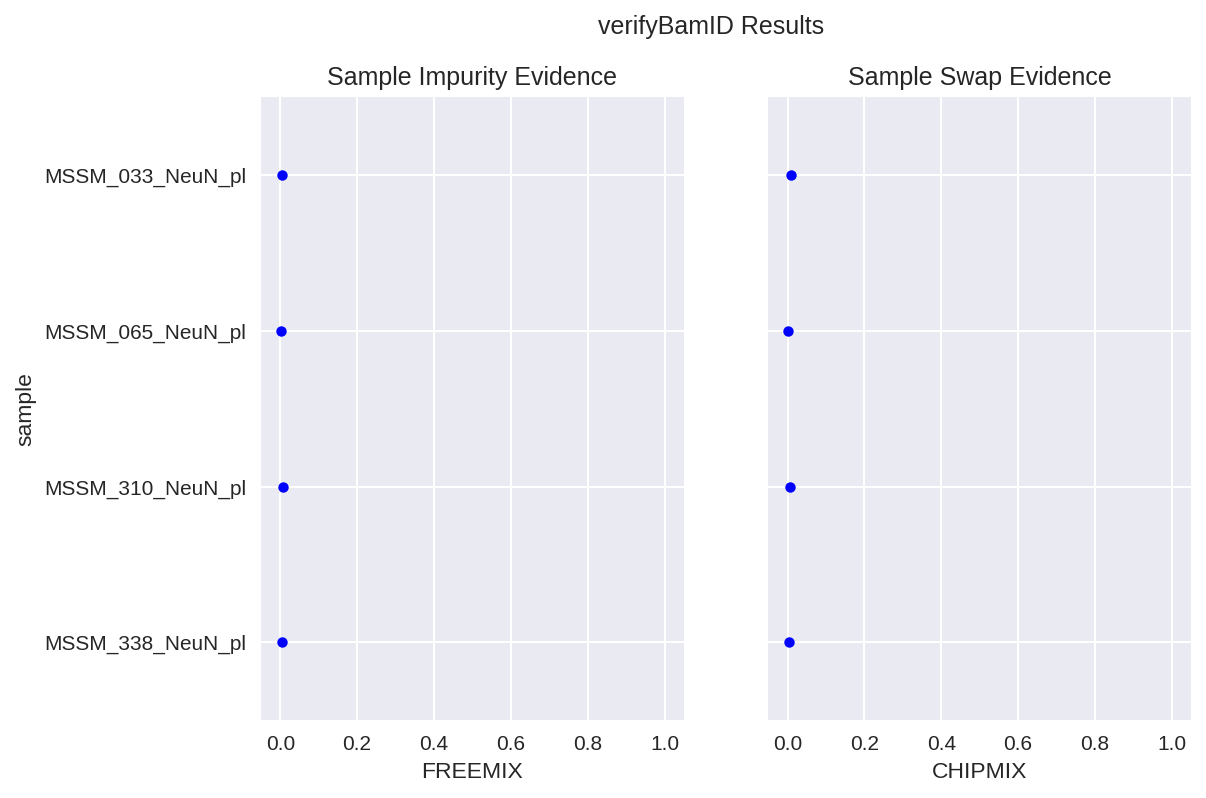

In [397]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
a = sns.stripplot(x='FREEMIX', y='sample', data=vres, jitter=False, color='blue', ax=ax[0])
b = sns.stripplot(x='CHIPMIX', y='sample', data=vres, jitter=False, color='blue', ax=ax[1])
a.axes.set_xlim([-0.05, 1.05])
a.axes.set_title('Sample Impurity Evidence')
a.grid('both')
b.grid('both')
b.axes.set_xlim([-0.05, 1.05])
b.axes.set_title('Sample Swap Evidence')
b.axes.set_ylabel('')
fig.suptitle('verifyBamID Results')
attila_utils.savefig(fig, 'freemix')

The plot shows that all samples are pure and there's no evidence for any swapped label.